# Dilema del prisionero iterado

* Un juego evolutivo es un juego en que las estrategias evolucionan a través de un proceso de selección dinámica.

* Se asume que el juego es jugado muchas veces por generaciones sucesivas de individuos.

* Cada individuo es representado por un cromosoma de tamaño 24.

* Cada gen del cromosoma representa una acción (0 para desertar, 1 para cooperar). 

* Cada cromosoma lo podemos interpretar como una estrategia, una secuencia de acciones.

* Para cada generación, cada individuo juega 24 veces contra cada miembro de la generaciónm siguiendo la estrategia de su cromosoma. 
* El individuo lleva un registro de sus recompensas acumuladas. 
* En cada generación, los dos individuos con los pagos acumulados más altos serán seleccionados para ser los padres de la próxima generación.


* Por la formulación del juego, los individuos no actúan ni piensan estratégicamente: sólo siguen estrategias con respecto a las acciones del contrincante.
* Por tal motivo, las preguntas del experimento son: 
    * ¿Evolucionaría esta población de agentes ingenuos de tal manera que solo sobrevivirían los desertores? 
    * Es decir, ¿la evolución selectiva de la población generará un resultado similar al que alcanzarían los jugadores de pensamiento racional y estratégico lo que, dicho sea de paso, implica que todos estarán peor que en el caso de que todos cooperen?

In [1]:
import random
import numpy as np

# Genera población aleatoria binaria de m bit-string y cromosomas de tamaño L
def rand_population_binary(m,L):
    return [[random.randint(0, 1) for l in range(L)]for i in range(m)]

# Función que implementa el algoritmo insertion sort para ordenar un diccionario
def insertion_sort_dict(A_dict):
    A = list(A_dict.values())
    llaves = list(A_dict.keys())
    i = 1
    while i < len(A):
        j = i
        while (j > 0) and (A[j-1] < A[j]):
            A[j-1],A[j] = A[j],A[j-1]
            llaves[j-1],llaves[j] = llaves[j],llaves[j-1]
            j = j - 1
        i = i +1
    return {k:v for k,v in zip(llaves,A)}

# Función que calcula los pagos de un juego
def compute_payoff(estA,estB):
    payoffs = {(0,0) : (1,1),
               (0,1) : (5,0),
               (1,0) : (0,5),
               (1,1) : (3,3)}
    
    return payoffs[(estA,estB)]

# Función que implementa el juego
def play_game(poblacion):

    payoffs_individuos = {i:0 for i in range(len(poblacion))}
    
    for indA,estA in enumerate(poblacion):
        for indB,estB in enumerate(poblacion):
            if indA != indB:
                for actA,actB in zip(estA,estB):
                    payoffA,payoffB = compute_payoff(actA,actB)
                    payoffs_individuos[indA] += payoffA
                    payoffs_individuos[indB] += payoffB

    return payoffs_individuos

# Selección por ruleta
def seleccion(payoffs_individuos,poblacion):
    suma_payoffs = sum(payoffs_individuos.values())
    payoffs_individuos = {k: v/suma_payoffs for k,v in payoffs_individuos.items()}
    payoffs_individuos = insertion_sort_dict(payoffs_individuos)
    payoffs_individuos = list(payoffs_individuos.items())
    
    n = int(len(payoffs_individuos)/2)

    suma_acumulada = np.cumsum([v for (k,v) in payoffs_individuos])

    individuos_dict = {i:{} for i in range(n)}

    for pareja in range(n):
        for individuo in range(2):
            aleatorio = random.random()
            index_ind = np.where(suma_acumulada >= aleatorio)[0][0]
            individuos_dict[pareja][individuo] = poblacion[payoffs_individuos[index_ind][0]]

    return individuos_dict

# Cruza en un punto
def cruza(seleccion,length_total_cromosoma):
    n = len(seleccion)

    nueva_poblacion = []

    for pareja in range(n):
        punto_cruza = random.randint(0, length_total_cromosoma)

        primer_nuevo_individuo = seleccion[pareja][0][0:punto_cruza] + seleccion[pareja][1][punto_cruza:length_total_cromosoma]
        segundo_nuevo_individuo = seleccion[pareja][1][0:punto_cruza] + seleccion[pareja][0][punto_cruza:length_total_cromosoma]

        nueva_poblacion.append(primer_nuevo_individuo)
        nueva_poblacion.append(segundo_nuevo_individuo)

    return nueva_poblacion

# Mutación
def mutacion(nueva_poblacion,L_cromosoma):

    mutacion_param = 2/L_cromosoma
    n = len(nueva_poblacion)

    for ind_index, ind in enumerate(nueva_poblacion):
        if random.random() < mutacion_param:
            punto_cruza = random.randint(0, L_cromosoma-1)
            nueva_poblacion[ind_index][punto_cruza] = int(not nueva_poblacion[ind_index][punto_cruza])
                
    return nueva_poblacion


In [8]:
# Parámetros de la ejecución
popsize = 200
L_crom = 24
maxiter = 300


# Iniciamos el algoritmo genético

## Generamos población inicial
poblacion = rand_population_binary(popsize,L_crom)

## Evaluamos la población inicial
poind  = play_game(poblacion)

## Definimos una lista que guardará el payoff promedio para cada ronda
payoff_avg = []


for it in range(maxiter):
    print("-----------------------------")
    print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
    print("        Iteración {}".format(it))
    print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
    print("-----------------------------")

    sel = seleccion(poind,poblacion)
    poblacion = cruza(sel,L_crom)
    poblacion = mutacion(poblacion,L_crom)

    payoff_avg.append( sum([i/(popsize*2*L_crom) for i in poind.values()])/popsize)
    mejor_individuo = poblacion[list(insertion_sort_dict(poind).items())[0][0]]

    poind  = play_game(poblacion)


-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 1
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 2
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 3
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 4
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 5
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 6
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
--------------------

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 59
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 61
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 62
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 63
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 64
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 65
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-------------

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 117
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 118
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 119
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 120
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 121
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 122
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 123
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
------

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 175
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 176
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 177
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 178
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 179
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 180
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 181
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
------

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 233
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 234
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 235
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 236
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 237
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 238
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 239
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
------

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 291
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 292
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 293
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 294
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 295
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 296
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 297
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
------

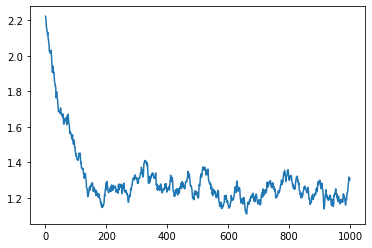

In [6]:
import matplotlib.pyplot as plt 
plt.plot(payoff_avg)

In [7]:
mejor_individuo

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]